In [25]:
#Listing 5.5
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=1e-4)

model.compile(loss='binary_crossentropy',
              optimizer=opt,   
              metrics=['accuracy'])

# Listing 5.7
import os, shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# directories
original_dataset_dir = '/Users/roy/Downloads/kaggle_original_data/PetImages'
base_dir = '/Users/roy/Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
validation_cats_dir = os.path.join(validation_dir, 'cats')
test_cats_dir = os.path.join(test_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_dogs_dir = os.path.join(test_dir, 'dogs')

#ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

model.save('cats_and_dogs_small_1.h5')

2021-12-04 16:40:56.775886: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

/usr/local/lib/python3.9/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-12-04 16:40:57.788811: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
 87/100 [=========================>....] - ETA: 3s - loss: 0.6916 - accuracy: 0.5236

2021-12-04 16:41:21.922193: W tensorflow/core/framework/op_kernel.cc:1680] Unknown: UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x16720da40>
Traceback (most recent call last):

  File "/usr/local/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 249, in __call__
    ret = func(*args)

  File "/usr/local/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 645, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 892, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/usr/local/lib/python3.9/site-packages/keras/engine/data_adapter.py", line 822, in wrapped_generator
    for data in generator_fn():

  File "/usr/local/lib/python3.9/site-packages/keras/engine/data_adapter.py", line 948, in generator_fn
    yield x[i]

  File "/usr/local/lib/python3.9/site-packages/keras_preprocessing/image/

 88/100 [=========================>....] - ETA: 3s - loss: 0.6915 - accuracy: 0.5239

UnknownError:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x16720da40>
Traceback (most recent call last):

  File "/usr/local/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 249, in __call__
    ret = func(*args)

  File "/usr/local/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 645, in wrapper
    return func(*args, **kwargs)

  File "/usr/local/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 892, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/usr/local/lib/python3.9/site-packages/keras/engine/data_adapter.py", line 822, in wrapped_generator
    for data in generator_fn():

  File "/usr/local/lib/python3.9/site-packages/keras/engine/data_adapter.py", line 948, in generator_fn
    yield x[i]

  File "/usr/local/lib/python3.9/site-packages/keras_preprocessing/image/iterator.py", line 65, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/usr/local/lib/python3.9/site-packages/keras_preprocessing/image/iterator.py", line 227, in _get_batches_of_transformed_samples
    img = load_img(filepaths[j],

  File "/usr/local/lib/python3.9/site-packages/keras_preprocessing/image/utils.py", line 114, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "/usr/local/lib/python3.9/site-packages/PIL/Image.py", line 3023, in open
    raise UnidentifiedImageError(

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x16720da40>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_1167]

Function call stack:
train_function


In [24]:
# Listing 5.7
import os, shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Create directories
original_dataset_dir = '/Users/roy/Downloads/kaggle_original_data/PetImages'
base_dir = '/Users/roy/Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
validation_cats_dir = os.path.join(validation_dir, 'cats')
test_cats_dir = os.path.join(test_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_dogs_dir = os.path.join(test_dir, 'dogs')

#ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

model.save('cats_and_dogs_small_1.h5')


# fnames = ['{}.jpg'.format(i) for i in range(10)]
# for fname in fnames:
#     src = os.path.join(os.path.join(original_dataset_dir, 'Cat'), fname)
#     img = mpimg.imread(src)
#     imgplot = plt.imshow(img)
#     print(src)
#     plt.show()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


NameError: name 'model' is not defined

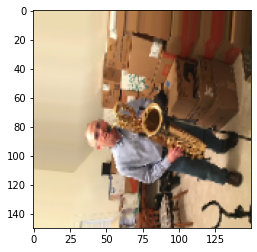

In [23]:
#Listing 5.12
from tensorflow.keras.preprocessing import image

datagen = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

img_path = '/Users/roy/src/cousera/tensorflow/pic1.png'
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    plt.show()
    if i%4 == 1:
        break
